In [1]:
import pandas as pd
from warnings import filterwarnings as fw
fw('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Loan_Modelling.csv', index_col = 0)

In [3]:
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


In [5]:
df.nunique()

Age                    45
Experience             47
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [6]:
for col in df.columns:
    print(col, df[col].unique(), sep = '\n-------------\n')

Age
-------------
[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
Experience
-------------
[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
Income
-------------
[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 224 2

In [7]:
df[df['Experience']<0]

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0


In [8]:
df[df['Experience']<0].groupby(['Age', 'Education'])['Education'].describe().T

Age         23        24             25              26   28   29
Education    1    2    1    2    3    1    2     3    2    3    3
count      7.0  5.0  5.0  6.0  6.0  4.0  4.0  10.0  1.0  1.0  3.0
mean       1.0  2.0  1.0  2.0  3.0  1.0  2.0   3.0  2.0  3.0  3.0
std        0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  NaN  NaN  0.0
min        1.0  2.0  1.0  2.0  3.0  1.0  2.0   3.0  2.0  3.0  3.0
25%        1.0  2.0  1.0  2.0  3.0  1.0  2.0   3.0  2.0  3.0  3.0
50%        1.0  2.0  1.0  2.0  3.0  1.0  2.0   3.0  2.0  3.0  3.0
75%        1.0  2.0  1.0  2.0  3.0  1.0  2.0   3.0  2.0  3.0  3.0
max        1.0  2.0  1.0  2.0  3.0  1.0  2.0   3.0  2.0  3.0  3.0

In [9]:
df[df['Experience'] == 0].groupby(['Age', 'Education'])['Education'].describe().T

Age         24             25             26              27        29   30
Education    1    2    3    1    2    3    1    2     3    2    3    3    3
count      8.0  2.0  1.0  3.0  6.0  8.0  6.0  9.0  13.0  3.0  5.0  1.0  1.0
mean       1.0  2.0  3.0  1.0  2.0  3.0  1.0  2.0   3.0  2.0  3.0  3.0  3.0
std        0.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  NaN  NaN
min        1.0  2.0  3.0  1.0  2.0  3.0  1.0  2.0   3.0  2.0  3.0  3.0  3.0
25%        1.0  2.0  3.0  1.0  2.0  3.0  1.0  2.0   3.0  2.0  3.0  3.0  3.0
50%        1.0  2.0  3.0  1.0  2.0  3.0  1.0  2.0   3.0  2.0  3.0  3.0  3.0
75%        1.0  2.0  3.0  1.0  2.0  3.0  1.0  2.0   3.0  2.0  3.0  3.0  3.0
max        1.0  2.0  3.0  1.0  2.0  3.0  1.0  2.0   3.0  2.0  3.0  3.0  3.0

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [11]:
df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

# Seaborn Library
1. Distribution Plots (Single Column Data, to visualize its distribution)
    a.distplot
    b.histplot
    c.kdeplot
    d.rugplot
    e.displot
    f.jointplot  (two column data compared)
    g.scatterplot ("")
2.Categorical      (one categorical atleast)
    a.countplot 
    b.barplot       (one categorical alongwith one continuous numerical)
    c.boxplot
    d.stripplot
    e.swarmplot
    f.violinplot
3.Matrix
    a. heatmap
    b. clustermap
4.Regression Plot
    a. regression plot
    b. lmplot
5. Grids
    a. pairplot
    b. pairgrid
    c. JointGrid
    d. FaceGrid

In [13]:
import seaborn as sns

In [14]:
sns.set_style('darkgrid')

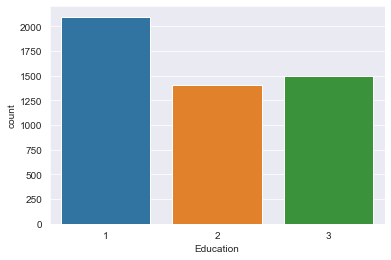

In [15]:
sns.countplot(x = 'Education', data = df)

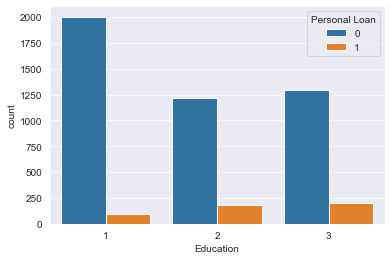

In [16]:
sns.countplot(x = 'Education', data = df, hue = 'Personal Loan')

In [17]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

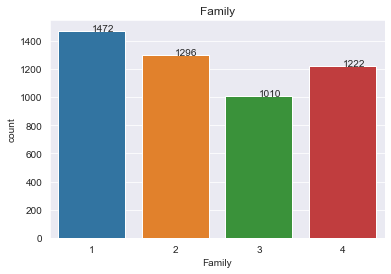

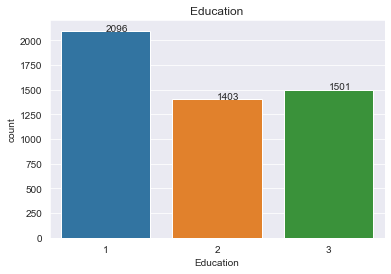

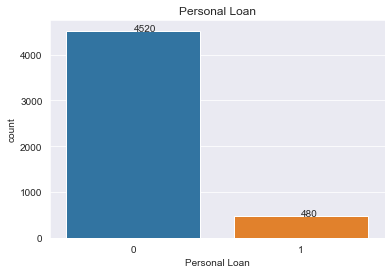

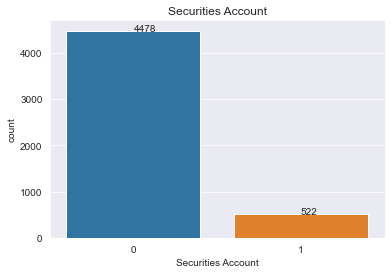

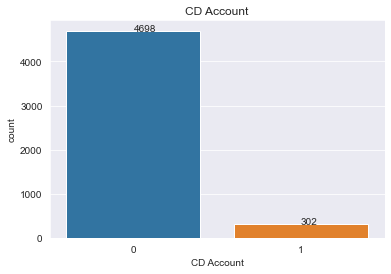

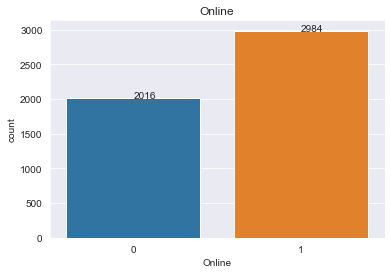

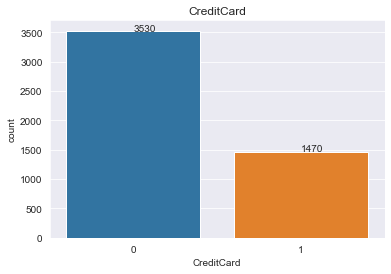

In [20]:
for col in ['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']:
    f = sns.countplot(x=col,data=df,)
    plt.title(col)
    for i in f.patches:
        x = i.get_x() + i.get_width()/2
        y = i.get_y() + i.get_height()    
        plt.annotate(i.get_height(),(x,y))
    plt.show()

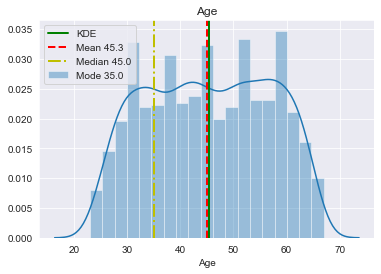

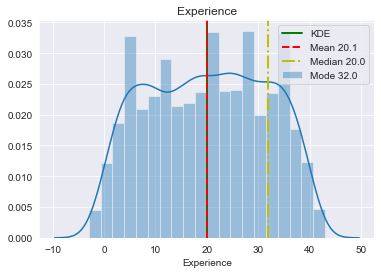

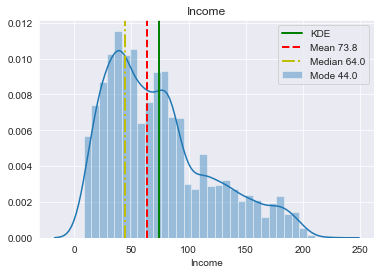

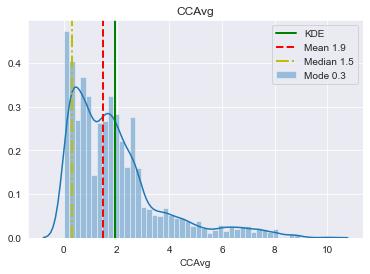

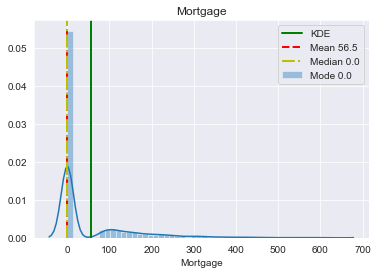

In [21]:
for col in ['Age','Experience','Income','CCAvg','Mortgage']:
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode().values[0]
    sns.distplot(df[col])
    plt.axvline(mean,color='g',ls='-',lw=2)
    plt.axvline(median,color='r',ls='--',lw=2)
    plt.axvline(mode,color='y',ls='-.',lw=2)
    plt.legend({'KDE':'','Mean %.1f'%mean:mean,'Median %.1f'%median:median,'Mode %.1f'%mode:mode,})
    plt.title(col)
    plt.show()

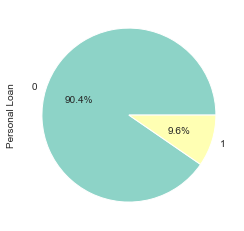

In [23]:
sns.set_palette('Set3')
df['Personal Loan'].value_counts().plot.pie(autopct='%1.1f%%')

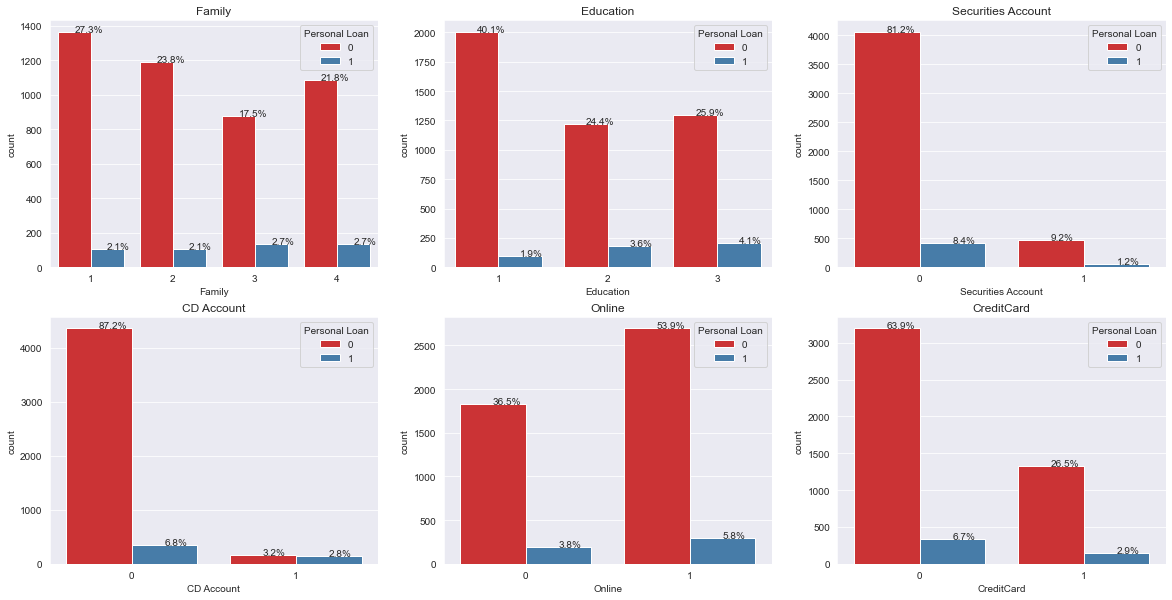

In [25]:
plt.figure(figsize=(20,10))
sns.set_palette('Set1')
for i,col in enumerate(['Family','Education','Securities Account','CD Account','Online','CreditCard']):
    plt.subplot(2,3,i+1)
    ax = sns.countplot(x=col, data = df,hue='Personal Loan')
    plt.title(col)
    for p in ax.patches:
        perc = '{:.1f}%'.format(100*p.get_height()/len(df[col]))
        x = p.get_x()+p.get_width() /2
        y = p.get_y()+p.get_height()
        plt.annotate(perc,(x,y))

AttributeError: module 'seaborn' has no attribute 'histplot'

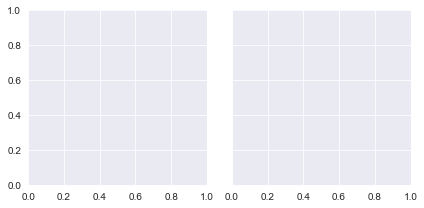

In [26]:
sns.set_palette('Set1')
for col in ['Age','Experience','Income','CCAvg','Mortgage']:
    fg = sns.FacetGrid(data=df,col='Personal Loan')
    fg.map(sns.histplot,col, bins=20)    
    plt.show()

### Working on Outliers

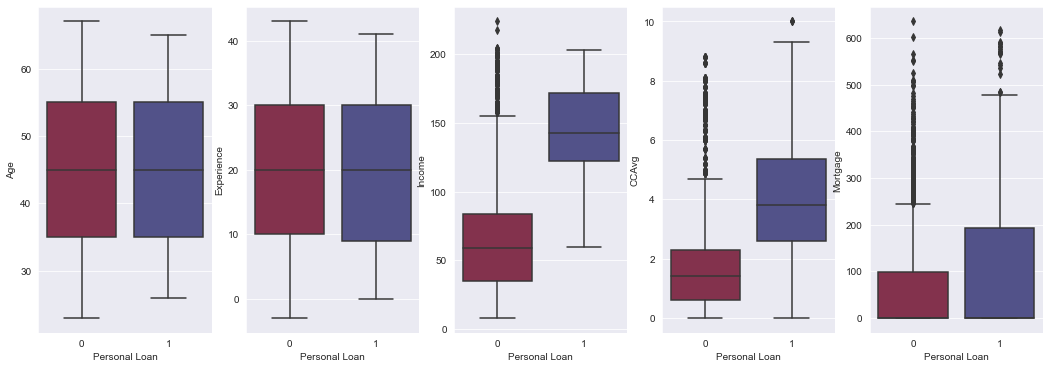

In [27]:
sns.set_palette('gist_stern')
plt.figure(figsize=(18,6))
for i,col in enumerate(['Age','Experience','Income','CCAvg','Mortgage']):
    plt.subplot(1,5,i+1)
    sns.boxplot(x='Personal Loan',y=col, data = df)

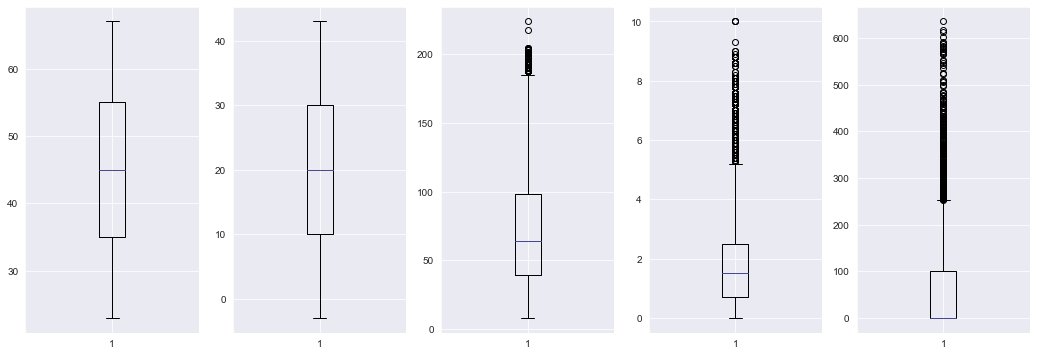

In [28]:
sns.set_palette('gist_stern')
plt.figure(figsize=(18,6))
for i,col in enumerate(['Age','Experience','Income','CCAvg','Mortgage']):
    plt.subplot(1,5,i+1)
    plt.boxplot(x=df[col])

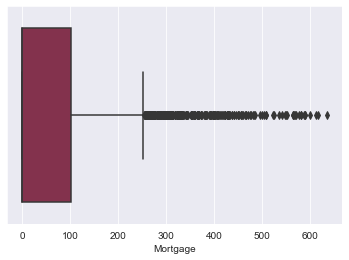

In [29]:
mortg_out = df['Mortgage']
sns.boxplot(x=mortg_out)

In [30]:
q1 = mortg_out.quantile(0.25)
q3 = mortg_out.quantile(0.75)
iqr = q3-q1
print(iqr,q1,q3)

101.0 0.0 101.0


In [31]:
min_q = q1 - 1.5*iqr
max_q = q3 + 1.5*iqr
print(min_q,max_q)

-151.5 252.5


In [32]:
mortg_out.shape

(5000,)

In [33]:
mortg_filt = mortg_out[(mortg_out >= min_q)&(mortg_out <= max_q)]

In [34]:
mortg_filt.shape

(4709,)

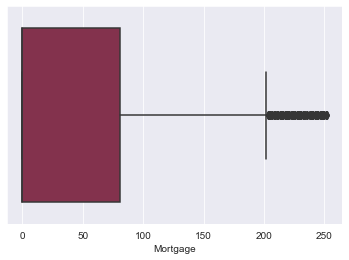

In [35]:
sns.boxplot(x=mortg_filt)

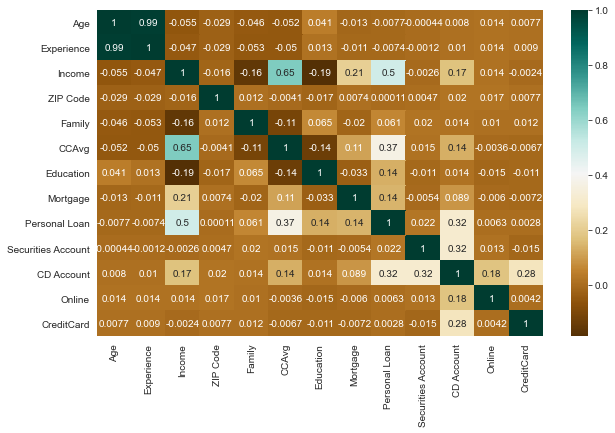

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='BrBG')

In [38]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [39]:
from sklearn.model_selection import train_test_split

In [43]:
x = df[['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account', 'Online', 'CreditCard']]
y = df['Personal Loan']

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [45]:
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, classification_report

In [46]:
def create_models(x,y):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25, random_state=11)
    model_dt = DecisionTreeClassifier().fit(xtrain,ytrain)
    model_rf = RandomForestClassifier().fit(xtrain,ytrain)
    print('Decision Tree')
    print('-'*20)
    print('Training Score:',model_dt.score(xtrain,ytrain))
    print('Testing Score:',model_dt.score(xtest,ytest))
    
    ypred_dt = model_dt.predict(xtest)
    cnf = pd.DataFrame(confusion_matrix(ytest,ypred_dt),index=['No','Yes'],columns=['No','Yes'])
    sns.heatmap(cnf, annot=True,fmt='d',cbar=None,cmap='YlGn')
    plt.show()
    
    print()
    print('Random Forest')
    print('-'*20)
    print('Training Score:',model_rf.score(xtrain,ytrain))
    print('Testing Score:',model_rf.score(xtest,ytest))
    
    ypred_rf = model_rf.predict(xtest)
    cnf = pd.DataFrame(confusion_matrix(ytest,ypred_rf),index=['No','Yes'],columns=['No','Yes'])
    sns.heatmap(cnf, annot=True,fmt='d',cbar=None,cmap='YlGn')
    
    return model_dt,model_rf